In [2]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', names=range(0, 55))
df_sample = raw_df.sample(10000, random_state=8)

In [3]:
merged_df = pd.merge(raw_df, df_sample, how='outer', indicator=True)
df = merged_df[merged_df['_merge'] == 'left_only'][raw_df.columns]

In [4]:
df.shape, raw_df.shape

((571012, 55), (581012, 55))

In [5]:
df = df.sample(10000, random_state=16)

X = df[range(0, 54)].to_numpy()
y = df[54].to_numpy()

Loading models

In [29]:
import pickle
from sklearn.metrics import confusion_matrix


RF_model = pickle.load(open('shallow_models/RF_clf.sav', 'rb'))
RF_result = RF_model.score(X, y)
RF_confusion = confusion_matrix(RF_model.predict(X), y)

In [31]:
import pickle

SVC_model = pickle.load(open('shallow_models/SVC_clf.sav', 'rb'))
SVC_result = SVC_model.score(X, y)
SVC_confusion = confusion_matrix(SVC_model.predict(X), y)

In [8]:
from tensorflow import keras
from sklearn.metrics import accuracy_score


NN_model = keras.models.load_model('deep_model/NN_clf')
NN_pred = NN_model.predict(X)

2023-04-14 02:06:13.516803: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 02:06:13.517840: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 02:06:13.535130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 02:06:13.535260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 02:06:13.866387: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

  1/313 [..............................] - ETA: 13s

2023-04-14 02:06:14.148732: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


313/313 [==============================] - 0s 392us/step


In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(y.reshape(-1, 1))

y_encoded = encoded_labels.toarray()
        

In [37]:
NN_result = accuracy_score(np.round(NN_pred), y_encoded)
NN_confusion = confusion_matrix(np.round(NN_pred).argmax(axis=1), y_encoded.argmax(axis=1))

In [16]:
heuristic_features = np.asarray([(item[0], item[2], item[5]) for item in X])
heuristic_features.shape

(10000, 3)

In [36]:
from heuristic_model.heuristic_model import SimpleHeuristicModel

heuristic_model = SimpleHeuristicModel()
heuristic_pred = heuristic_model.predict(heuristic_features)
heuristic_result = accuracy_score(heuristic_pred, y)
heuristic_confusion = confusion_matrix(heuristic_pred, y)

Presenting results

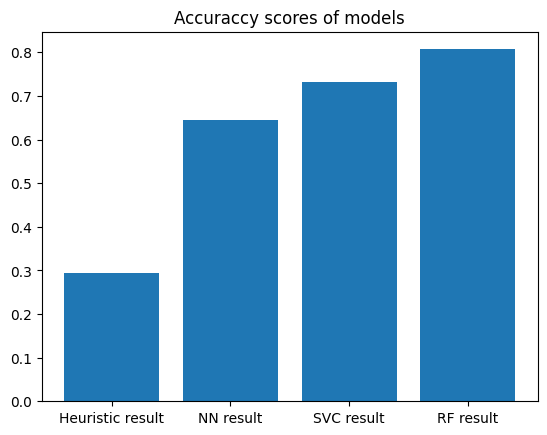

In [27]:
import matplotlib.pyplot as plt

values = [heuristic_result, NN_result, SVC_result, RF_result]
labels = ['Heuristic result', 'NN result', 'SVC result', 'RF result']

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Accuraccy scores of models')

plt.show()

In [38]:
NN_confusion

array([[3082, 1981,  114,    4,   11,   97,  208],
       [ 535, 2875,   73,    1,  158,   86,    4],
       [   0,   14,  311,   11,    0,   92,    0],
       [   0,    0,   19,   26,    0,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    9,   48,    8,    0,   33,    0],
       [  35,    4,    0,    0,    0,    0,  160]])

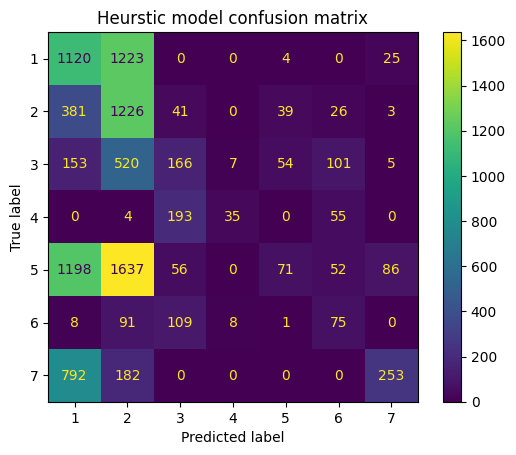

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=heuristic_confusion, display_labels=range(1, 8))
disp.plot()
plt.title('Heurstic model confusion matrix')
plt.show()

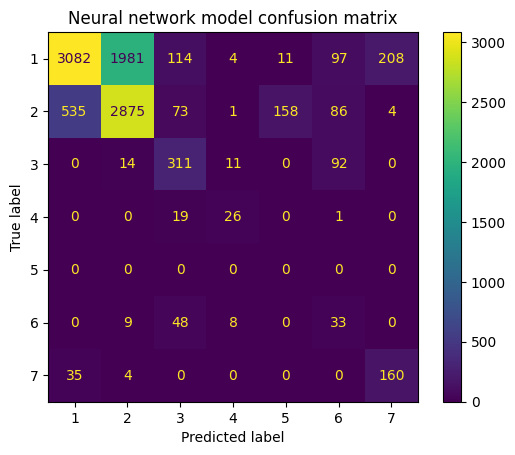

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=NN_confusion, display_labels=range(1, 8))
disp.plot()
plt.title('Neural network model confusion matrix')
plt.show()

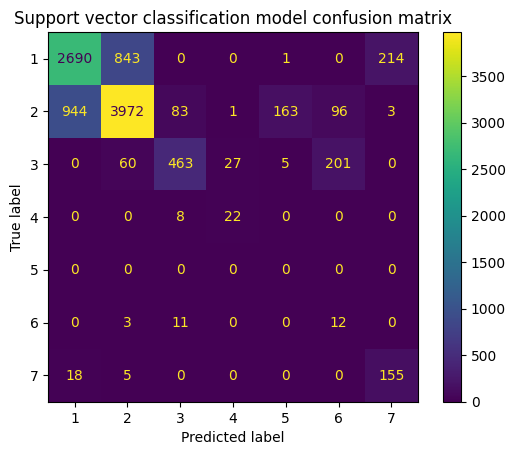

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=SVC_confusion, display_labels=range(1, 8))
disp.plot()
plt.title('Support vector classification model confusion matrix')
plt.show()

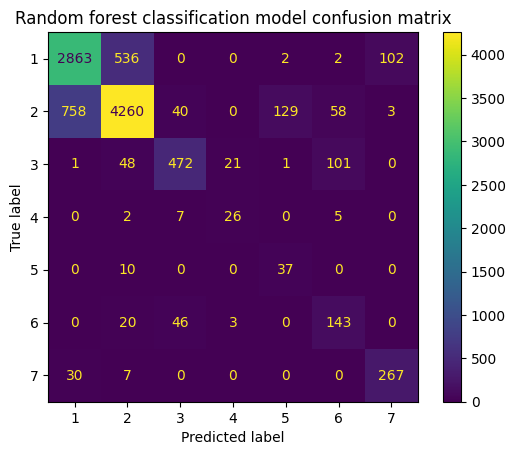

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=RF_confusion, display_labels=range(1, 8))
disp.plot()
plt.title('Random forest classification model confusion matrix')
plt.show()